<a href="https://colab.research.google.com/github/ghddusghk46/2024-1-my-BDA/blob/main/inclass/06w_0408_A_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


## 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.3 MB/s eta 0:00:00


In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [26]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

## 수업에서 사용할 데이터를 다음 깃에서 복사

In [5]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 4.76 MiB/s, done.


In [6]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 07 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

## 결측치 찾기

## 결측치 만들기

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex': ['M', 'F', np.nan, 'M', 'F'],
                          'score': [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [8]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

## 결측치 확인하기 pd.isna()

In [13]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [9]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [16]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [18]:
df.isna().sum()

sex      1
score    1
dtype: int64

In [19]:
df.isna().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [20]:
pd.Series([True, False, True]).sum()

2

In [21]:
df.isna().any()

sex      True
score    True
dtype: bool

In [22]:
df.isna().all()

sex      False
score    False
dtype: bool

In [23]:
df.isna().any(axis=1)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [24]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [25]:
df.notnull().all()

sex      False
score    False
dtype: bool

In [27]:
df.notnull().all(axis=1)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [28]:
# 적어도 하나 이상 NaN인 행을 추출, 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [30]:
# NaN이 하나도 없는 행을 추출, 시험 예상
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [32]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [31]:
df[[True]*5]

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [33]:
df[[True, True, False, False, True]]

,sex,score
0,M,5.0
1,F,4.0
4,F,NaN


## 결측값 시각화
- [패키지 missingno](https://github.com/ResidentMario/missingno)

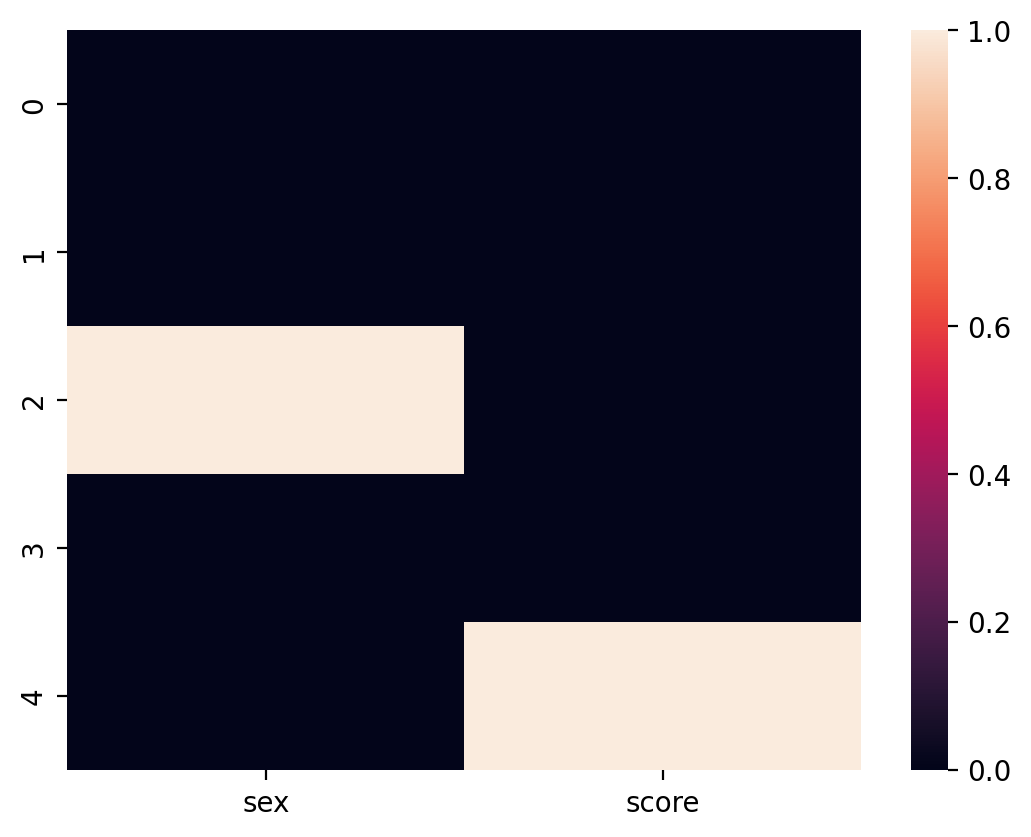

In [35]:
import seaborn as sns

sns.heatmap(df.isnull());

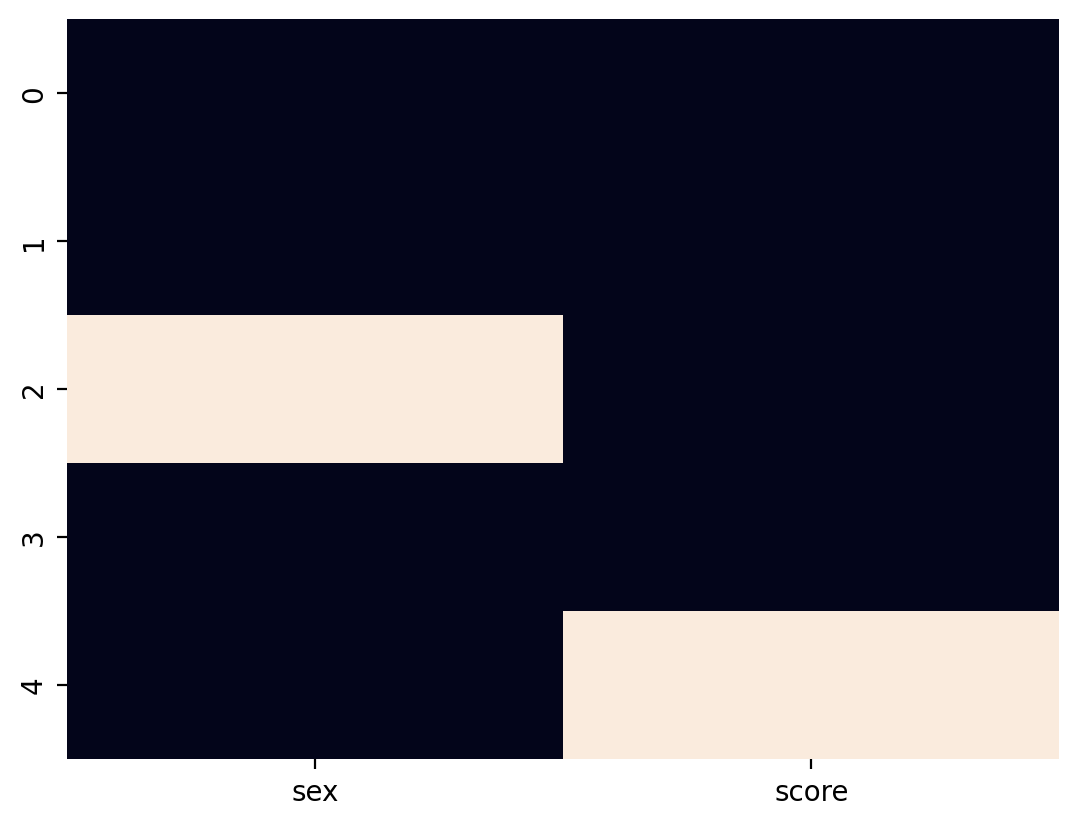

In [37]:
sns.heatmap(df.isnull(), cbar=False);

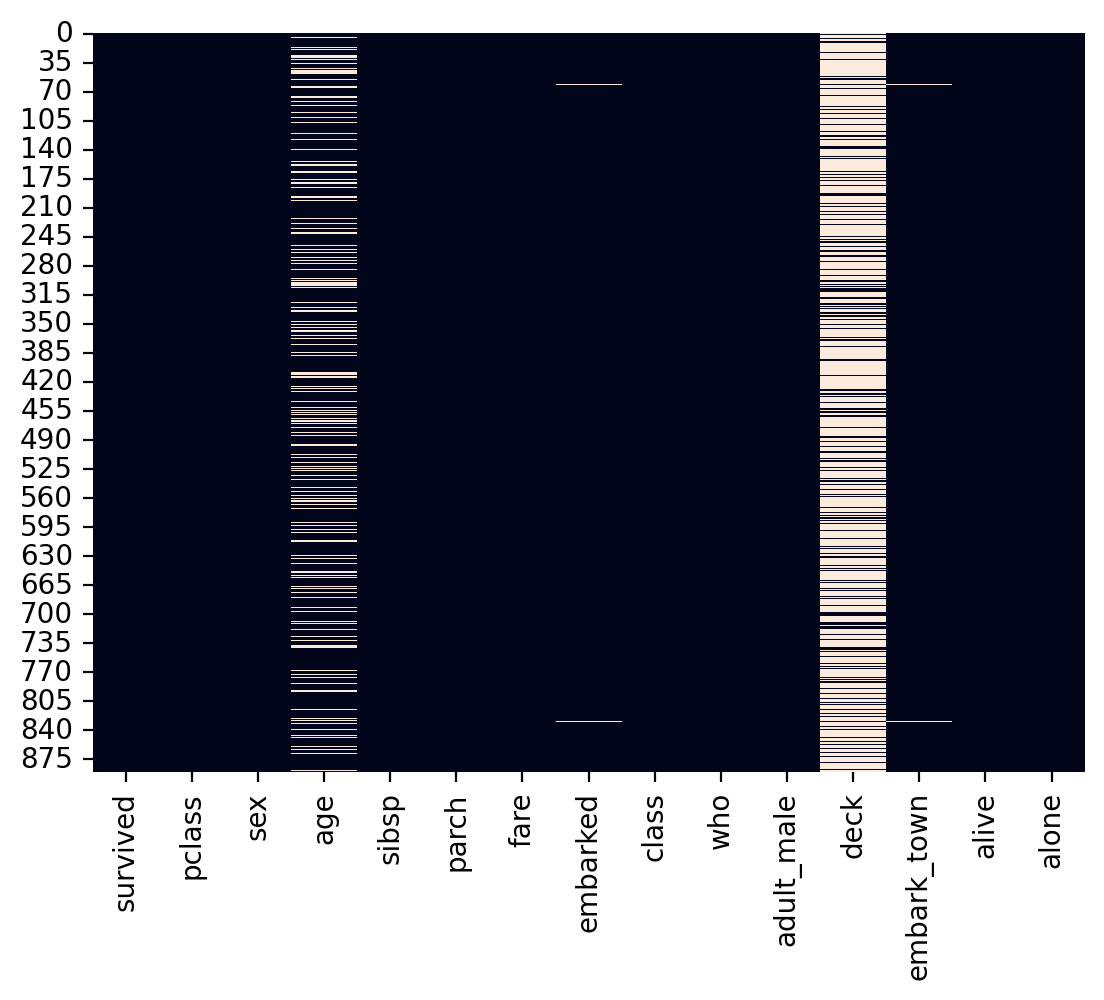

In [39]:
tdf = sns.load_dataset('titanic')
sns.heatmap(tdf.isnull(), cbar=False);

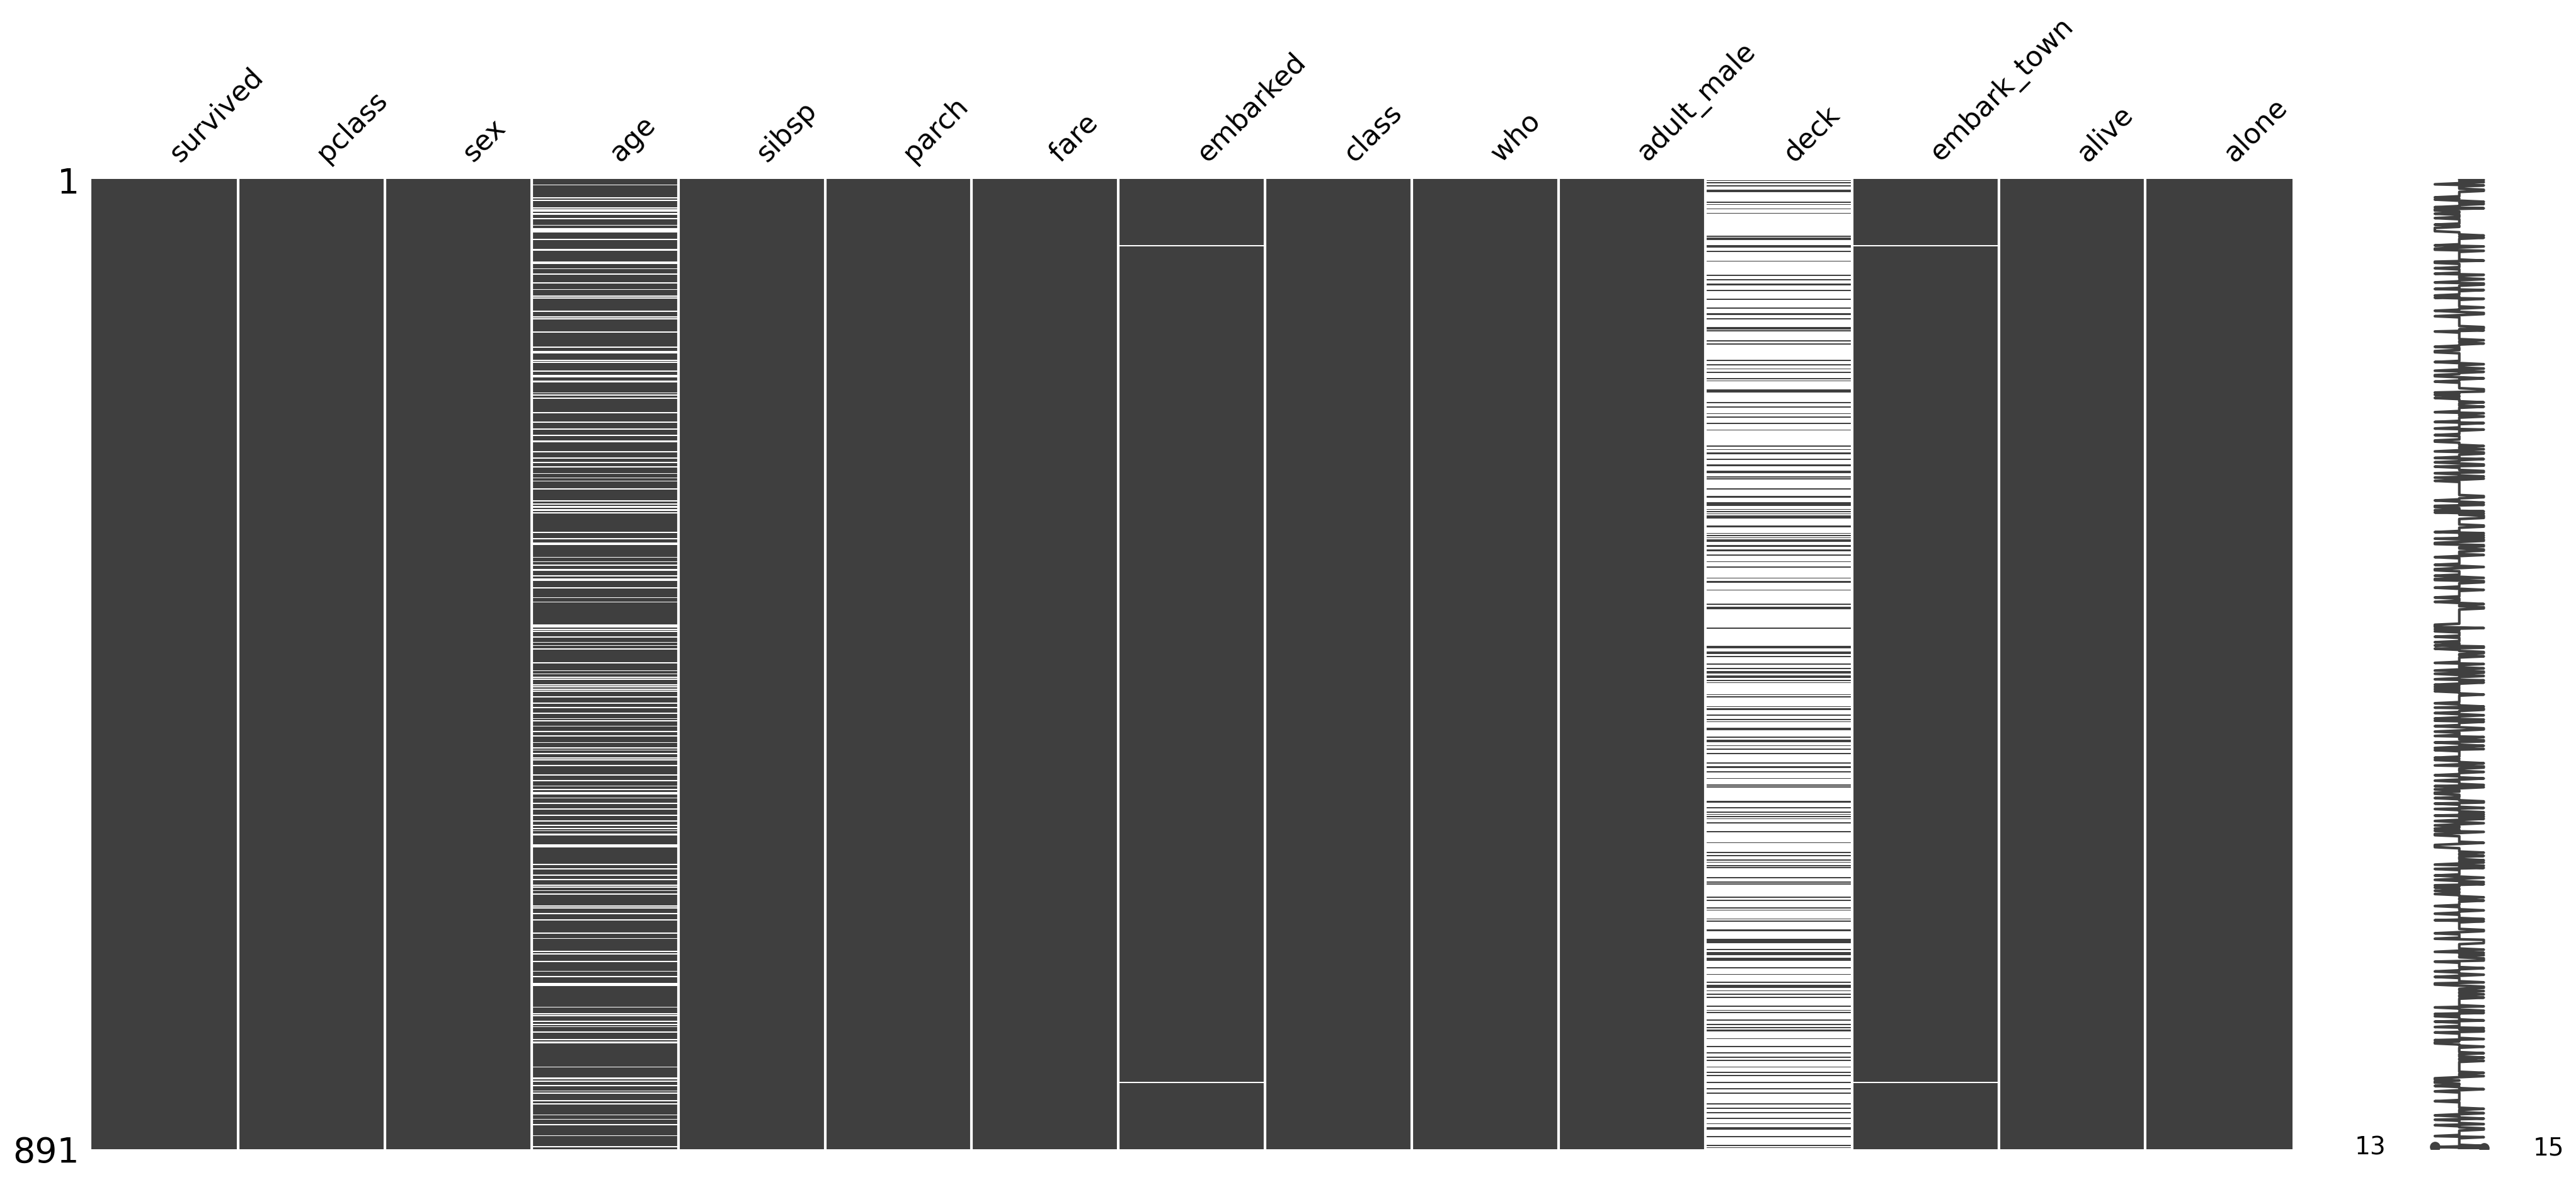

In [40]:
import missingno as msno
msno.matrix(tdf);

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
    - 선의 왼족은 15개중 13개의 데이터가 있는 행
    - 선의 오른족은 15개중 15개의 데이터가 있는 행

In [42]:
# 1 열이 모두 NaN인 행 추출
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [43]:
tdf[(tdf.age.isna()) & (tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [44]:
# 2 열이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [47]:
# 3 열이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [48]:
# 최소한 1개의 NaN에 있는 행 추출
tdf[tdf.isna( ).any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


<Axes: >

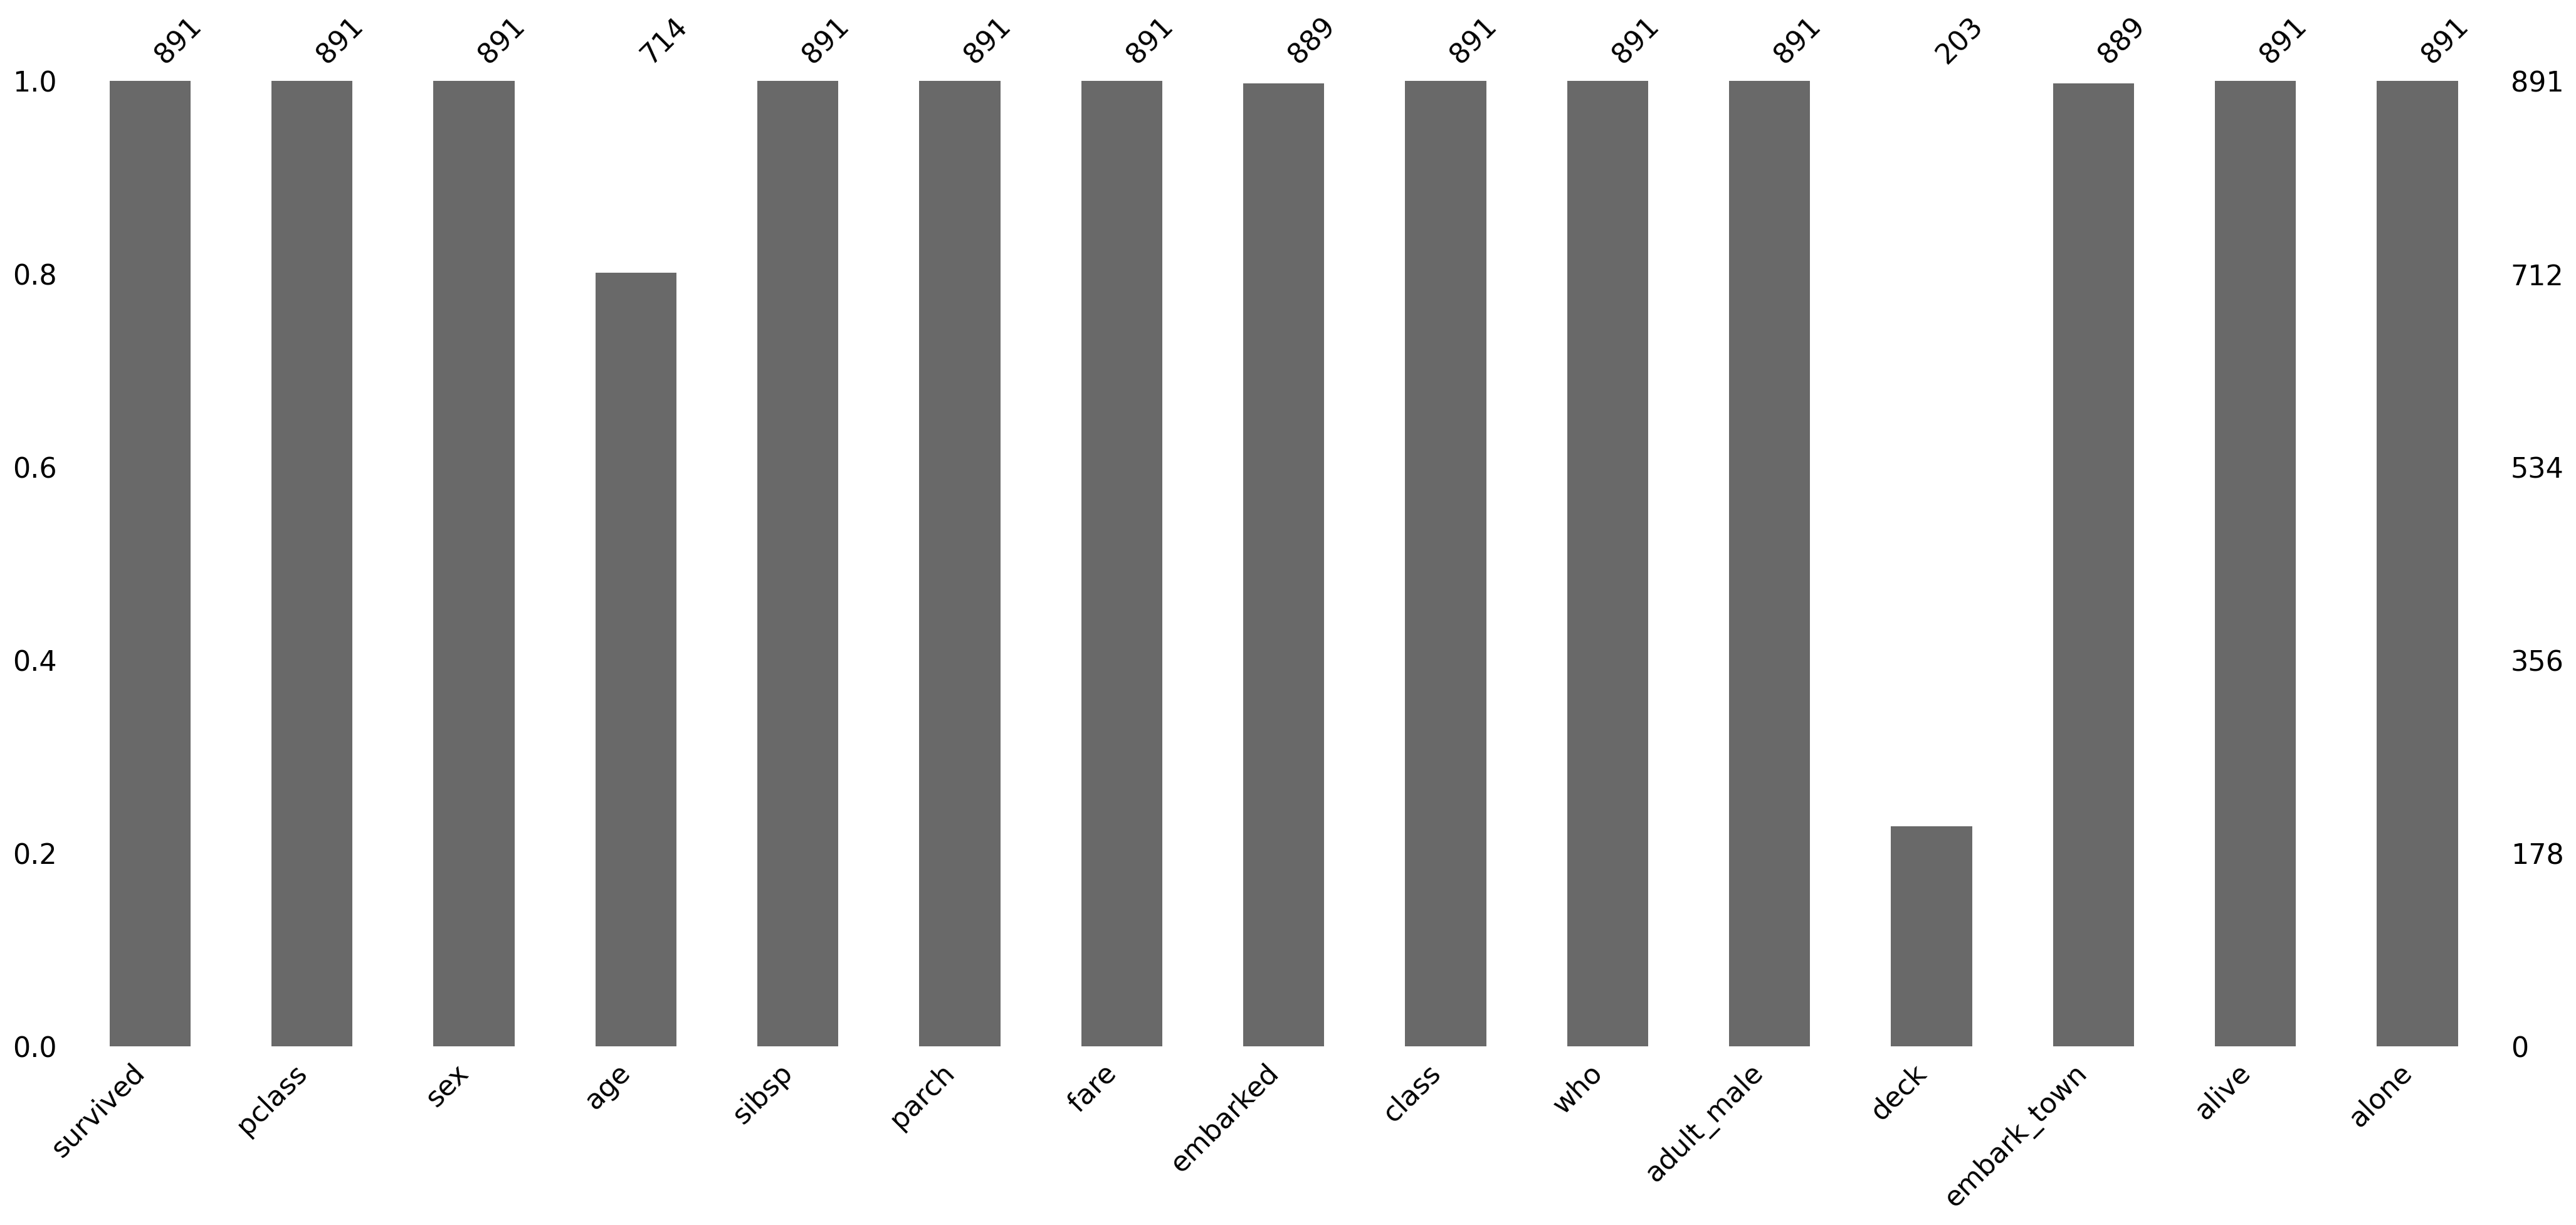

In [50]:
msno.bar(tdf)

<Axes: >

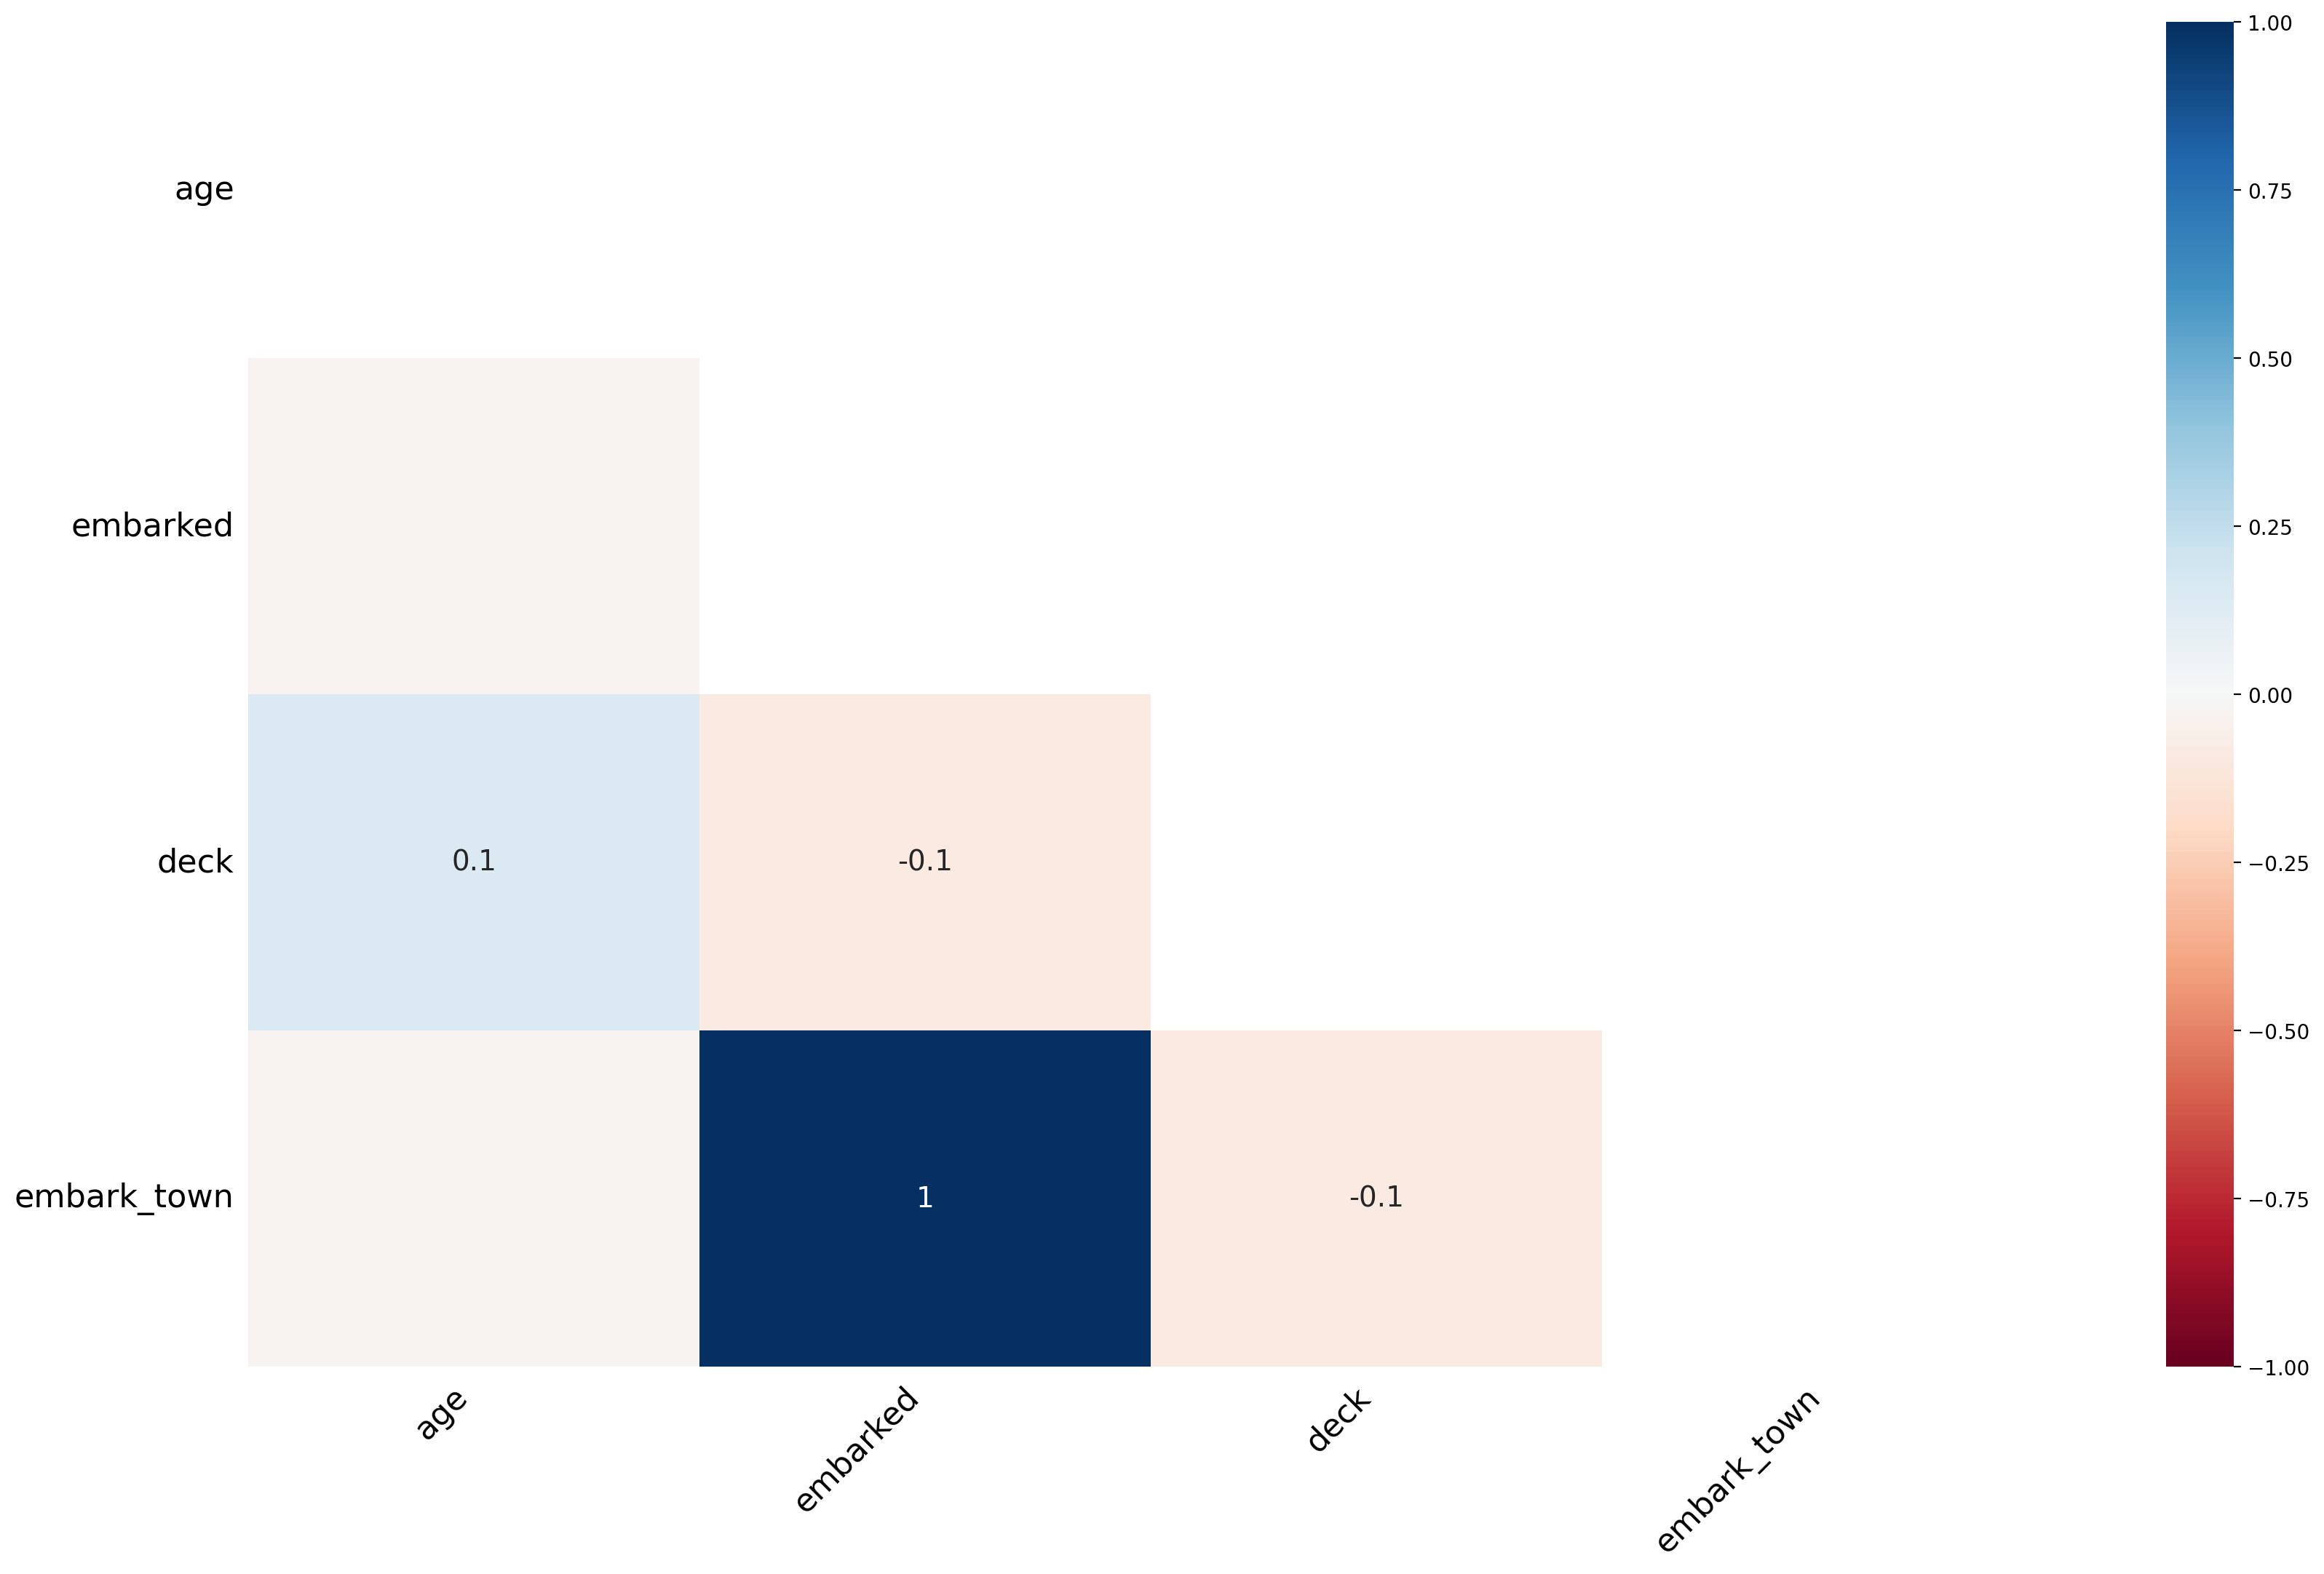

In [54]:
msno.heatmap(tdf)

## 결측치 제거하기

In [52]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [56]:
# 열 score에 NaN이 제거
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


- subset : 열 레이블 또는 레이블 시퀀스(선택 사항)
- 예를 들어 행을 드롭하는 경우, 다른 축인 열을 지정하면 그열에 null이 있는 행을 제거

In [58]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [59]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [60]:
df.dropna(axis=1)

""
0
1
2
3
4


In [61]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset = [2], axis=1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [63]:
df.dropna(subset = [2, 4], axis=1)

""
0
1
2
3
4


In [62]:
# 행 3에 NaN이 있으면 열을 제거
df.dropna(subset = [3], axis=1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [64]:
# score, sex에서 결측값이 있는 행 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## (알아 두면 좋아요) 결측치 제거하지 않고 분석하기

In [65]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [66]:
df['score'].mean() # 결측값은 제거(무시)하고 계산

4.0

In [67]:
df['score'].sum() # 결측값은 제거(무시)하고 계산

16.0

In [68]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [73]:
df = pd.DataFrame(dict(age=[5, 6, np.nan],
                      born=[pd.NaT, pd.Timestamp('1939-05-27'),
                            pd.Timestamp('1940-04-25')],
                      name=['Alfred', 'Baatman', ''],
                      toy=[None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Baatman,Batmobile
2,NaN,1940-04-25,,Joker


In [74]:
df.isna()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [75]:
ser = pd.Series([5, 6, np.NaN])
ser

0    5.0
1    6.0
2    NaN
dtype: float64

In [76]:
ser.isna()

0    False
1    False
2     True
dtype: bool

In [80]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [81]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [82]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [83]:
df.dropna(axis='columns')

""
0
1
2
3


In [84]:
df.dropna(axis=1) # axis = 'columns'

""
0
1
2
3


In [85]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [86]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


## 결측치 대체하기

## 평균값으로 결측치 대체하기

In [87]:
exam = pd.read_csv('data/exam.csv') # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [88]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [89]:
exam.loc[[2, 7, 14], 'math']

2    NaN
7    NaN
14   NaN
Name: math, dtype: float64

In [90]:
round(exam['math'].mean(), 2)

55.24

In [91]:
import numpy as np
np.set_printoptions(precision=1)
np.array([np.pi])

array([3.1])

In [93]:
exam.math.mean()

61.95

In [92]:
exam['math'] = exam['math'].fillna(100) # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [94]:
exam = pd.read_csv('data/exam.csv') # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [96]:
pd.set_option('display.precision', 3)
m = exam['math'].mean()
exam['math'] = exam['math'].fillna(m)
exam

,id,nclass,math,english,science
0,1,1,50.000,98,50
1,2,1,60.000,97,60
2,3,1,55.235,86,78
3,4,1,30.000,98,58
4,5,2,25.000,80,65
5,6,2,50.000,89,98
6,7,2,80.000,90,45
7,8,2,55.235,78,25
8,9,3,20.000,98,15
9,10,3,50.000,98,45


In [97]:
exam['math'].isna().sum() # 결측치 빈도 확인

0

## 07-2 이상값 정제하기

In [98]:
df = pd.DataFrame({'sex': [1, 2, 1, 3, 2, 1],
                   'score': [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [99]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [100]:
df['sex'].value_counts().sort_values()

sex
3    1
2    2
1    3
Name: count, dtype: int64

In [102]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [103]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [104]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [105]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [106]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [108]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df

,x1
0,1
1,1
2,2
3,2


In [109]:
df['x2'] = np.where(df['x1'] == 1, 10, np.nan) # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [110]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [111]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df

,x1
0,1
1,1
2,2
3,2


In [112]:
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan) # 조건에 맞으면 문자열 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [113]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [114]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [115]:
# 'etc'를 'NaN'으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [116]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


## 이상치 제거하기 - 극단적인 값

In [117]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [118]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
160,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv
16,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv


<Axes: ylabel='hwy'>

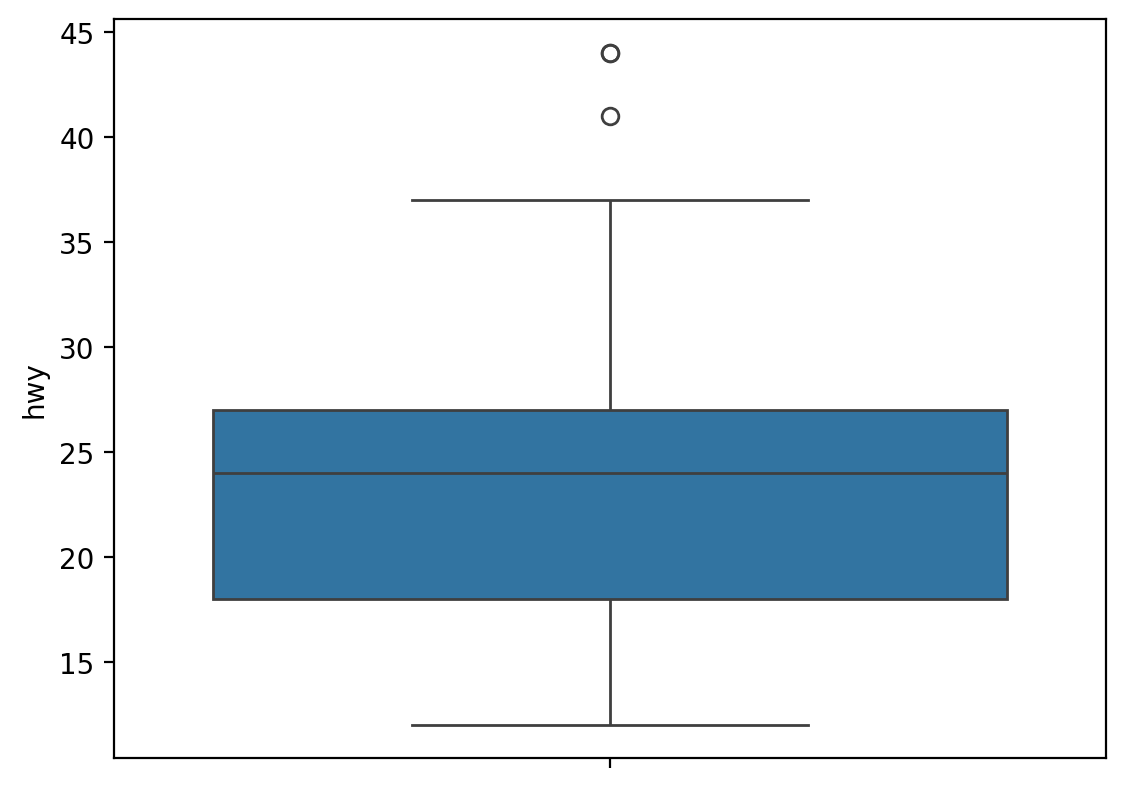

In [119]:
import seaborn as sns
sns.boxplot(mpg, y='hwy')

In [127]:
s1 = pd.Series([1, 2, 3, 4, 5])

In [128]:
s1.quantile()

3.0

In [135]:
s1.quantile([.25, .50, .75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [131]:
s2 = pd.Series([1, 2, 4, 5])

In [136]:
s2.quantile([.25, .50, .75])

0.25    1.75
0.50    3.00
0.75    4.25
dtype: float64

In [141]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [142]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [144]:
pct75 - pct25

9.0

In [145]:
iqr = pct75- pct25
iqr

9.0

In [148]:
pct25 - 1.5 * iqr # 하한

4.5

In [149]:
pct75 + 1.5 * iqr # 상한

40.5

In [150]:
mpg['hwy'].describe()

count    234.000
mean      23.440
std        5.955
min       12.000
25%       18.000
50%       24.000
75%       27.000
max       44.000
Name: hwy, dtype: float64

In [151]:
mpg['hwy'].describe()['25%']

18.0

In [155]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [156]:
len(mpg)

234

## 3. 극단치를 결측 처리하기

In [161]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [162]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [163]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,27.728
r,21.000


In [164]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,27.728
r,21.000


In [166]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex': [1, 2, 1, 3, 2, 1],
                   'score': [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum() # 결측치 확인
df_nomiss = df.dropna(subset = ['score']) # 결측치 제거
df_nommis = df.dropna(subset = ['score', 'sex']) # 여러 변수 동시에 결측치 제거

## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25) # 1사분위수
pct75 = mpg['hwy'].quantile(.75) # 3사분위수
iqr = pct75 - pct25 # IQR
pct25 - 1.5 * iqr # 하한
pct75 + 1.5 * iqr # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])